# Pymaceuticals Inc

# Observations

•The regression analysis result showed that there is a strong positive correlation between mouse weight and average tumor volume which is 0.84 meaning when the mouse weight increases the average tumor volume increases.



•	Capomulin and Ramicare were the most drug used for treatment in the number of mice tested in the study.


•In terms of gender, there were 51% mice male and 49% were female mice used in the study to test different types of drugs over the course of 45 days.



# Analysis¶

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
data_combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="outer")


In [6]:
# Display the data table for preview
data_combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
number_mice= len(data_combined_df["Mouse ID"].unique())
number_mice
 

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate =data_combined_df.loc[data_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_id=data_combined_df.loc[data_combined_df["Mouse ID"]=="g989"]
mice_duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_id_df=data_combined_df[data_combined_df["Mouse ID"]!="g989"]
clean_mouse_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=len(clean_mouse_id_df["Mouse ID"].unique())
number_of_mice

248

# Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_id_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [13]:
# Use groupby and summary statistical methods to calculate the mean
drug_regimen_mean =clean_mouse_id_df['Tumor Volume (mm3)'].groupby(clean_mouse_id_df['Drug Regimen']).mean()
drug_regimen_mean 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Use groupby and summary statistical methods to calculate the median
drug_regimen_median =clean_mouse_id_df["Tumor Volume (mm3)"].groupby(clean_mouse_id_df["Drug Regimen"]).median()
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Use groupby and summary statistical methods to calculate the variance
drug_regimen_variance =clean_mouse_id_df["Tumor Volume (mm3)"].groupby(clean_mouse_id_df["Drug Regimen"]).var()
drug_regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Use groupby and summary statistical methods to calculate the standard deviation
drug_regimen_std_dev =clean_mouse_id_df["Tumor Volume (mm3)"].groupby(clean_mouse_id_df["Drug Regimen"]).std()
drug_regimen_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Use groupby and summary statistical methods to calculate the SEM
drug_regimen_sem =clean_mouse_id_df["Tumor Volume (mm3)"].groupby(clean_mouse_id_df["Drug Regimen"]).sem()
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary_df= pd.DataFrame({
    "Mean Tumor Volume":drug_regimen_mean,
    "Median Tumor Volume":drug_regimen_median,
    "Tumor Volume Variance":drug_regimen_variance,
    "Tumor Volume Std. Dev":drug_regimen_std_dev,
    "Tumor Volume Std. Err":drug_regimen_sem})
# Display the Summary statistics table
drug_regimen_summary_df
    

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
clean_mouse_id_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

clean_mouse_id_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Number_of_mice = clean_mouse_id_df["Drug Regimen"].value_counts()
Number_of_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

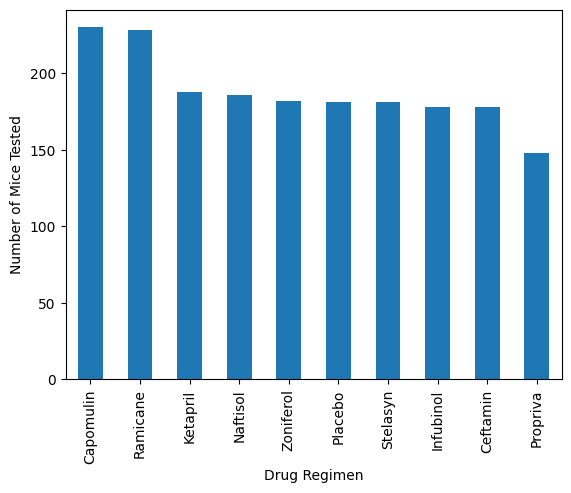

In [22]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Number_of_mice = clean_mouse_id_df['Drug Regimen'].value_counts()
Number_of_mice.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

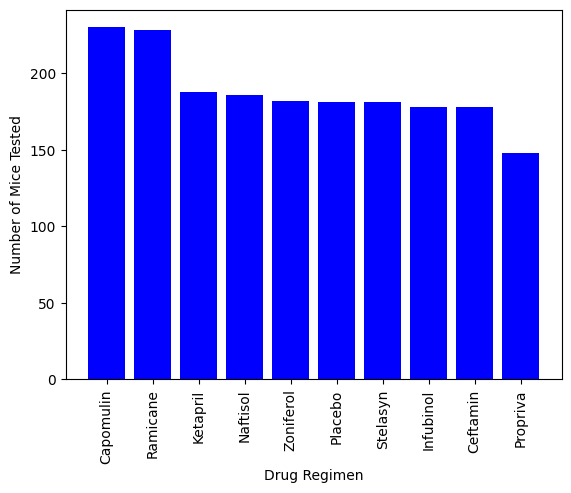

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Number_of_mice = clean_mouse_id_df['Drug Regimen'].value_counts()
x_axis =Number_of_mice.index.values
plt.bar(x_axis,Number_of_mice,color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

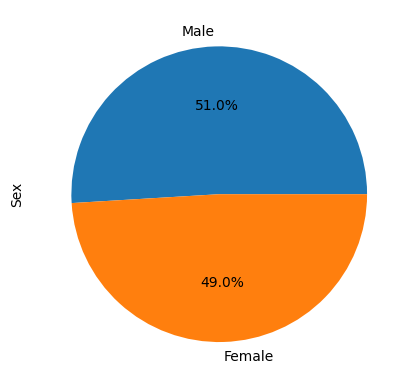

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandasgender_data = clean_df["Sex"].value_counts()
gender= clean_mouse_id_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

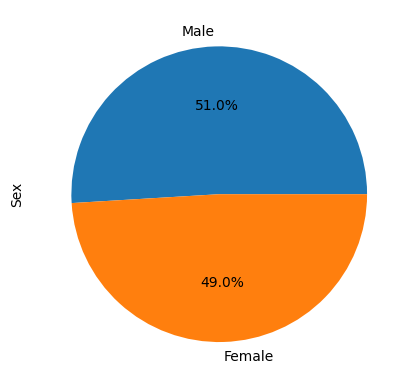

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = gender
plt.pie(sizes, labels=labels, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()


# Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
vol_tumor = clean_mouse_id_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data= vol_tumor.merge(clean_mouse_id_df, on=("Mouse ID","Timepoint"),how="left")
final_tumor_volume_df = vol_tumor.reset_index()
final_tumor_volume_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
            vol_tumor=final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
            tumor_vol.append(vol_tumor)
            #print(tumor_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers.             
            quartiles = vol_tumor.quantile([.25,.5,.75])
            lowerq = quartiles[.25]
            upperq = quartiles[.75]
            iqr = upperq-lowerq
            iqr
            #print(iqr)
            lower_bound=lowerq-(1.5*iqr)
            upper_bound = upperq+1.5*iqr
 # Determine outliers using upper and lower bounds
            outliers = vol_tumor.loc[(vol_tumor < lower_bound)|(vol_tumor > upper_bound)]
            outliers
            print(f"{drug}'s potential outliers: {outliers}") 


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


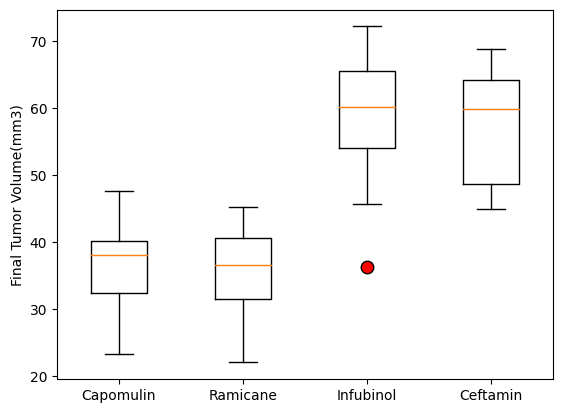

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = drugs,flierprops={'markerfacecolor':'r','markersize': 9})
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

# Line and Scatter Plots

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot=clean_mouse_id_df.loc[clean_mouse_id_df["Mouse ID"] == "l509",:]
line_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


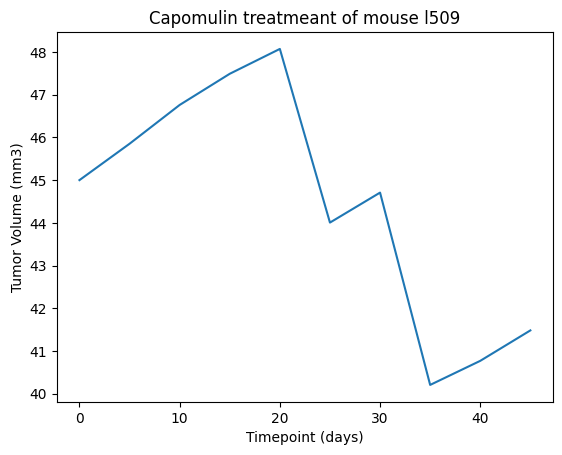

In [30]:
#plotting 
x_axis= line_plot["Timepoint"]
tumor = line_plot["Tumor Volume (mm3)"] 
plt.plot(x_axis,tumor,markersize=10) 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()

In [31]:
# Capomulin DataFrame and calculating mean
capomulin_df = clean_mouse_id_df.loc[clean_mouse_id_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()
capomulin_df 
#average = capomulin_df["Tumor Volume (mm3)"].mean()
#average

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


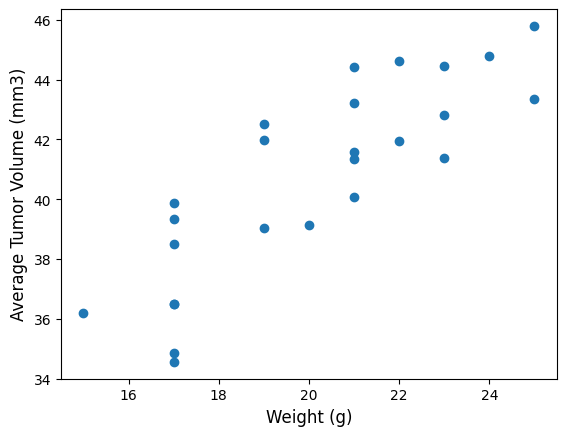

In [32]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =12)
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


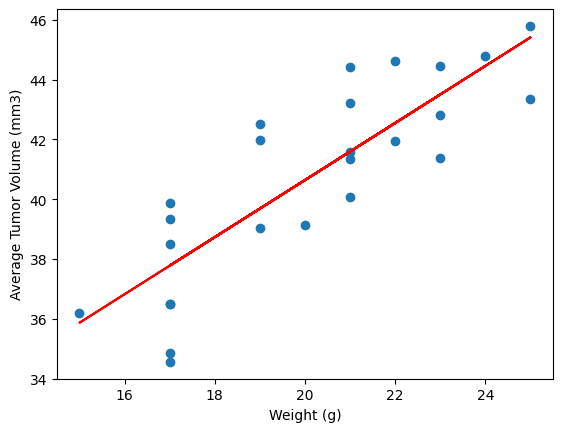

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values= capomulin_df["Weight (g)"]
y_values= capomulin_df["Tumor Volume (mm3)"]
correlation= st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()